In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
# 2. load data and check top 20 rows
data = pd.read_csv("nyc_taxi_data_2014.csv")
print(data.head(20))

C:\Users\tram.le2\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


   vendor_id      pickup_datetime     dropoff_datetime  passenger_count  \
0        CMT  2014-01-09 20:45:25  2014-01-09 20:52:31                1   
1        CMT  2014-01-09 20:46:12  2014-01-09 20:55:12                1   
2        CMT  2014-01-09 20:44:47  2014-01-09 20:59:46                2   
3        CMT  2014-01-09 20:44:57  2014-01-09 20:51:40                1   
4        CMT  2014-01-09 20:47:09  2014-01-09 20:53:32                1   
5        CMT  2014-01-09 20:45:07  2014-01-09 20:51:01                1   
6        CMT  2014-01-09 20:44:04  2014-01-09 21:05:45                1   
7        CMT  2014-01-09 20:43:23  2014-01-09 20:52:07                1   
8        CMT  2014-01-09 20:43:04  2014-01-09 20:54:29                1   
9        CMT  2014-01-09 20:50:23  2014-01-09 20:58:10                1   
10       CMT  2014-01-09 20:51:36  2014-01-09 21:15:07                1   
11       CMT  2014-01-09 20:48:04  2014-01-09 21:01:37                1   
12       CMT  2014-01-09 

In [4]:
#3. check data info -> convert pick up/dropoff datetime from object to datetime
data.info()
data['pickup_datetime']=pd.to_datetime(data['pickup_datetime'])
data['dropoff_datetime']=pd.to_datetime(data['dropoff_datetime'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999999 entries, 0 to 14999998
Data columns (total 18 columns):
vendor_id             object
pickup_datetime       object
dropoff_datetime      object
passenger_count       int64
trip_distance         float64
pickup_longitude      float64
pickup_latitude       float64
rate_code             int64
store_and_fwd_flag    object
dropoff_longitude     float64
dropoff_latitude      float64
payment_type          object
fare_amount           float64
surcharge             float64
mta_tax               float64
tip_amount            float64
tolls_amount          float64
total_amount          float64
dtypes: float64(11), int64(2), object(5)
memory usage: 2.0+ GB


In [5]:
#4. eliminate duplicate values
data = data.drop_duplicates()

In [6]:
#5. check null value and eliminate null values
data.isnull().sum().sort_values(ascending=False)
#there are total nearly 15million records, 7603464 record with null store_and_fwd_flag -> need to recheck before drop the data
# I found out that null store and fwd flag happens for VTS vendor only. However I don't understand the meaning of
# store_and_fwd_flag

store_and_fwd_flag    7635979
dropoff_latitude          145
dropoff_longitude         145
rate_code                   0
pickup_datetime             0
dropoff_datetime            0
passenger_count             0
trip_distance               0
pickup_longitude            0
pickup_latitude             0
total_amount                0
tolls_amount                0
payment_type                0
fare_amount                 0
surcharge                   0
mta_tax                     0
tip_amount                  0
vendor_id                   0
dtype: int64

In [7]:
#6. 145 null records in dropoff_longitute and dropoff_latitude -> the number of null value is small (145)
# -> eliminate null value
data=data.dropna(subset =['dropoff_longitude','dropoff_latitude'])

In [8]:
#7. check nonnegative value
data.describe()
#-> all passenger count, distance, fare mount, surchage,mta_tax,tip_amount,tolls_amount,total_amount positive value
# longitude and latitude are ok to have negative value

,passenger_count,trip_distance,pickup_longitude,pickup_latitude,rate_code,dropoff_longitude,dropoff_latitude,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
count,1.499976e+07,1.499976e+07,1.499976e+07,1.499976e+07,1.499976e+07,1.499976e+07,1.499976e+07,1.499976e+07,1.499976e+07,1.499976e+07,1.499976e+07,1.499976e+07,1.499976e+07
mean,1.701847e+00,2.792119e+00,-7.296777e+01,4.019371e+01,1.033788e+00,-7.290770e+01,4.016140e+01,1.201330e+01,3.145942e-01,4.982275e-01,1.455931e+00,2.404242e-01,1.452346e+01
std,1.390736e+00,3.326130e+00,8.585117e+00,4.761990e+00,7.177251e-01,8.842468e+00,4.897659e+00,1.006706e+01,3.633412e-01,2.971738e-02,2.244657e+00,1.191034e+00,1.216675e+01
min,0.000000e+00,0.000000e+00,-7.366000e+02,-1.800000e+02,0.000000e+00,-7.754167e+02,-1.800000e+02,2.500000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.500000e+00
25%,1.000000e+00,1.000000e+00,-7.399198e+01,4.073535e+01,1.000000e+00,-7.399135e+01,4.073420e+01,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,8.000000e+00
50%,1.000000e+00,1.700000e+00,-7.398183e+01,4.075298e+01,1.000000e+00,-7.398007e+01,4.075337e+01,9.000000e+00,0.000000e+00,5.000000e-01,1.000000e+00,0.000000e+00,1.100000e+01
75%,2.000000e+00,3.080000e+00,-7.396735e+01,4.076724e+01,1.000000e+00,-7.396351e+01,4.076839e+01,1.350000e+01,5.000000e-01,5.000000e-01,2.000000e+00,0.000000e+00,1.610000e+01
max,2.080000e+02,1.000000e+02,8.054390e+01,7.328431e+01,2.100000e+02,1.193360e+02,4.040833e+02,5.000000e+02,1.340000e+01,5.000000e-01,2.000000e+02,2.000000e+01,7.000000e+02


In [9]:
#8. clean up illogical logic. exp: pickup_datetime > dropoff_Datetime
data= data[data.pickup_datetime < data.dropoff_datetime]
#since I don't know abt the capacity of taxi, the limit speed, limit distance of NYC cities -> dont know rule to set

In [10]:
#9. Add Year, Month, Week, Day, Hour, trip_duration to the data
data['pickup_datetime']=pd.to_datetime(data['pickup_datetime'])
data['Day']=data['pickup_datetime'].dt.weekday
data['Week']=data['pickup_datetime'].dt.week
data['Month']=data['pickup_datetime'].dt.month
data['Year']=data['pickup_datetime'].dt.year
data['Hour']=data['pickup_datetime'].dt.hour

data['trip_duration']=data['dropoff_datetime'] - data['pickup_datetime']
data['trip_duration'].describe()
data['trip_duration']=data['trip_duration'].dt.total_seconds()

data['trip_duration'].dtype
data['trip_duration']=data['trip_duration'].astype('int64')

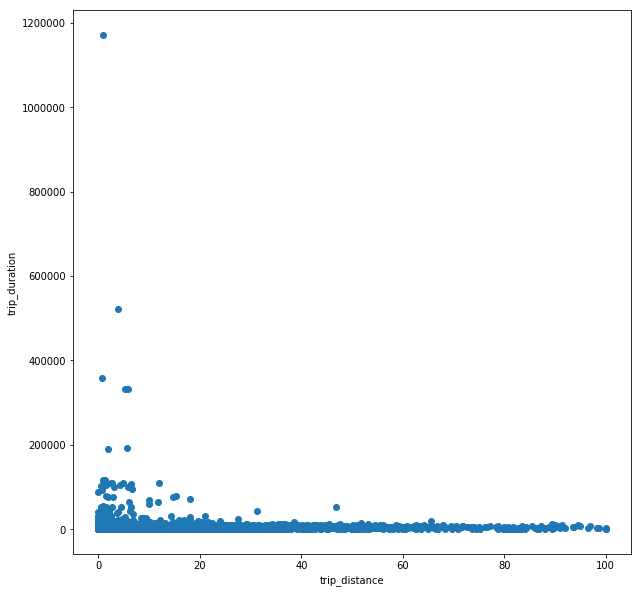

In [11]:
#10. Plot scatter plot between trip_duration and trip_distance
plt.figure(figsize=(10,10))
plt.scatter( data["trip_distance"],data["trip_duration"])
plt.xlabel('trip_distance')
plt.ylabel('trip_duration')
plt.show()
#-> abnormal distribution. Some records with very short distance but long time. Why?. Is it because of waiting time in congestion
#or other reasons. The longest duration is 13 days, which is impossible for a taxi drive. In reality, the taxi trip duration
# that is greater than 1 day, is already abnormal
# These record could be outlier (doesn't make sense to the data) -> need to be drop out.
# the threshold to detect outlier is 100.000second (~27h). Another way to detect outlier, check z score. IF the value is
# out of range (-3z,3z) , these value can be treated as outlier

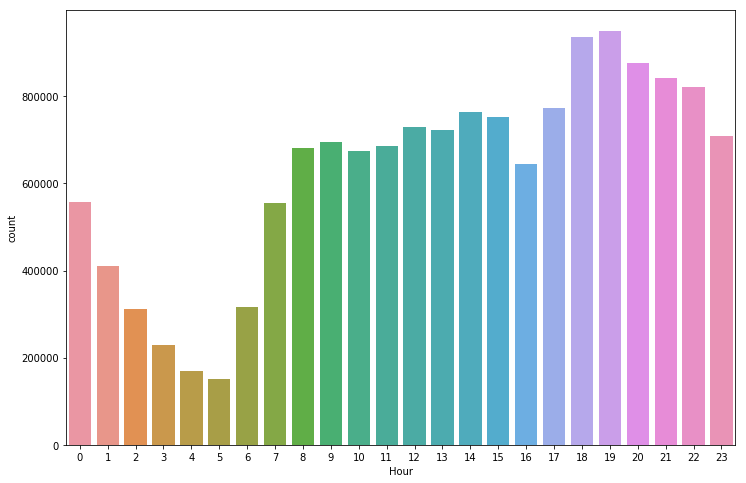

In [12]:
#11a. plot taxi demand & time (Week, Day, Hour)
plt.figure(figsize=(12,8))
sns.countplot(x="Hour", data=data)
plt.show()
# interm of hour -> the highest demand time are from 18h to 23h. The lowest demand time are between 4-5h am

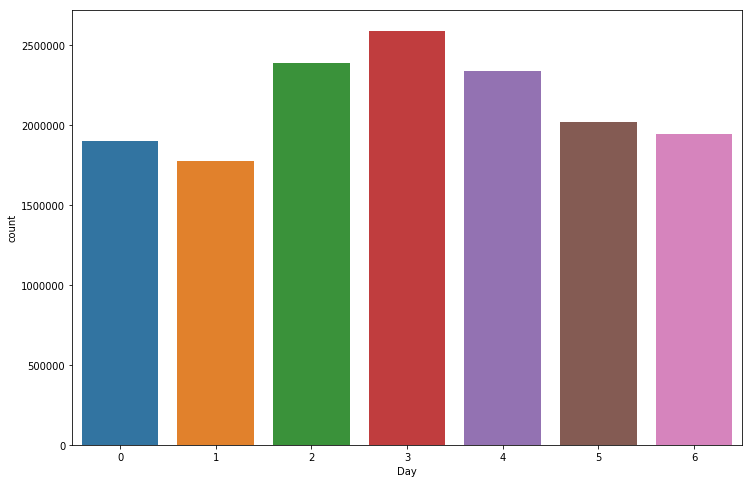

In [13]:
#in term of day
plt.figure(figsize=(12,8))
sns.countplot(x="Day", data=data)
plt.show()
#- > Day have value from 0 to 6, while 0 is sunday and 6 is saturday. The demand for taxi drive is quite
# even from Monday to Sunday. The highest demand during the week is day from Tuesday to Thursday (around 2.500.000 drives).
# the lowest demand is on Monday (around 1.700.000)

In [ ]:
#in term of month -> there are only 2 months which are January and February in dataset
# -> Since the cycle is small, I don't want to plot these info

In [14]:
# 12. define unique vendors
unique_vendors1 = data.vendor_id.unique()
#  vendor_id -> there are 2 uniques value for vendor_id which are "CMT" and "VTS"

In [15]:
#13. create pivot table to see the number of drivers, revenue from each vendor
#a. no of drive
a1=data.pivot_table(index='vendor_id',columns='Week',values='total_amount',aggfunc='count')
a1

Week,1,2,3,4,5,6,7,9
vendor_id,,,,,,,,
CMT,2606340.70,4374446.80,4477201.70,3977726.30,3107750.50,369513.00,1263416.40,NaN
VTS,2912291.22,4627466.98,4710240.52,4298943.11,3304938.69,1277817.45,29.22,560713.59


In [18]:
#b.sumof total amount
a2=data.pivot_table(index='vendor_id',columns='Week',values='total_amount',aggfunc=np.sum)
a2

Week,1,2,3,4,5,6,7,9
vendor_id,,,,,,,,
CMT,1.265677e+07,2.265608e+07,2.332131e+07,2.106098e+07,1.707840e+07,1722048.31,7.221386e+06,NaN
VTS,1.381407e+07,2.349323e+07,2.404184e+07,2.230553e+07,1.779069e+07,6487307.07,9.290000e+01,2949157.35


In [19]:
# c.sum of trip distance
a3=data.pivot_table(index='vendor_id',columns='Week',values='trip_distance',aggfunc=np.sum)
a3

Week,1,2,3,4,5,6,7,9
vendor_id,,,,,,,,
CMT,2606340.70,4374446.80,4477201.70,3977726.30,3107750.50,369513.00,1263416.40,NaN
VTS,2912291.22,4627466.98,4710240.52,4298943.11,3304938.69,1277817.45,29.22,560713.59


(array([53642.,  2854.,  1941., ...,   145.,   311.,  1475.]),
 array([0.00000000e+00, 1.65700083e-02, 3.31400166e-02, ...,
        1.99668600e+01, 1.99834300e+01, 2.00000000e+01]),
 <a list of 1207 Patch objects>)

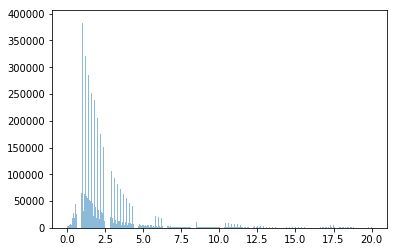

In [20]:
#14. plot histogram of trip_distance
plt.hist(data['trip_distance'],bins ='auto',range=[0,20], alpha=0.5,rwidth=0.85)
#-> abnormal distribution, there are some distance with very high peak, the area is not smooth. The range step are quite even
#-> hypothesis: there are 2 kinds of distributions here and can be different for each vendor

(array([12138.,  3451.,  5026.,  5744.,  5919.,  5796.,  5561.,  5583.,
         5617.,  5876.,  6500., 11469.,  9123., 10610., 12393., 14392.,
        16930., 19086., 21824., 24418., 26836., 30115., 50739., 37643.,
        40034., 43065., 45227., 47421., 50078., 51827., 53885., 55551.,
        57377., 59716., 91364., 62337., 62926., 63485., 64912., 64599.,
        65137., 65541., 64822., 65691., 65656., 98313., 65144., 66040.,
        65520., 65370., 64928., 64140., 63981., 63014., 62480., 61396.,
        61336., 91272., 59777., 58972., 58675., 57539., 57302., 56037.,
        55624., 55040., 53656., 54032., 79070., 52146., 51554., 50829.,
        50488., 49894., 48943., 48291., 48087., 47001., 46311., 68698.,
        44857., 44848., 43318., 42747., 42392., 42044., 41558., 40727.,
        39930., 39046., 39415., 57685., 38108., 37093., 36416., 36015.,
        35330., 34877., 34434., 33899., 33423., 32581., 48340., 31584.,
        30650., 30822., 30314., 29496., 28917., 28340., 28289., 

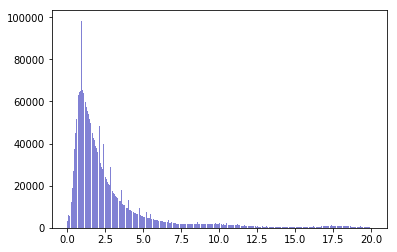

In [21]:
#15. break down histogram of trip distance by vendor_id
#a.for vendor_id ='VTS'
b2= data[data['vendor_id']=='VTS']
fig2=plt.hist(b2['trip_distance'],bins ='auto',range=[0,20], alpha=0.5,rwidth=0.85,color='#0504aa')
fig2
#Insight: the distribution of this vendor has smooth function. The distance are shown in continuous value. The coule be a policy that
# the speedometer change continuously.

(array([ 42848.,      0.,      0.,      0.,  15409.,      0.,      0.,
             0.,      0.,  32140.,      0.,      0.,      0.,      0.,
         76159.,      0.,      0.,      0.,      0., 140646.,      0.,
             0.,      0.,      0., 208649.,      0.,      0.,      0.,
             0., 264059.,      0.,      0.,      0.,      0., 300218.,
             0.,      0.,      0., 317309.,      0.,      0.,      0.,
             0., 321163.,      0.,      0.,      0.,      0., 316922.,
             0.,      0.,      0.,      0., 305564.,      0.,      0.,
             0.,      0., 290220.,      0.,      0.,      0.,      0.,
        272088.,      0.,      0.,      0.,      0., 257405.,      0.,
             0.,      0., 241779.,      0.,      0.,      0.,      0.,
        227128.,      0.,      0.,      0.,      0., 211426.,      0.,
             0.,      0.,      0., 196868.,      0.,      0.,      0.,
             0., 182160.,      0.,      0.,      0.,      0., 168819.,
      

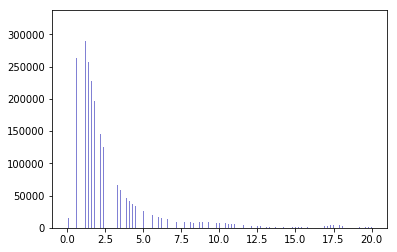

In [22]:
#15b. for vendor_id = 'CMT'
b1= data[data['vendor_id']=='CMT']
fig1=plt.hist(b1['trip_distance'],bins ='auto',range=[0,20], alpha=0.5,rwidth=0.85,color='#0504aa')
fig1
#the distribution of this vendor is step function, since the step range is quite even. There is a hypothesis that this vendor's distance policy
# follow step function. For example, for each 500m, the speedometer will change one time.


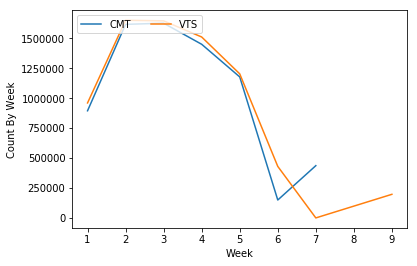

In [23]:
# 16. Plot no of drive for each vendor in the same plot
groupbymonth = data.groupby(by =['vendor_id','Week']).count()
unique_vendors = data.vendor_id.unique()
for vendor in unique_vendors:
    week_df = groupbymonth.loc[(vendor, )]
    plt.plot(week_df.index, week_df.pickup_datetime, label=vendor)

plt.legend(loc=2, ncol=2)
plt.xlabel("Week")
plt.ylabel("Count By Week")
plt.show()
#Insight: WHy there is no data logged for Week 8,9 with vendor "CMT" and no data logged for Week 8 for vendor "VTS". The
# system has some problem then there is no data logged or another reason? Week 9 is a partial week so the data is small
# to evaluate. Another hypothesis is the data updated for VTS is realtime while the data updated for CMT vendor is offline
# (for example: at the end of the week)
# VTS has higher number of drive rather than CMT vendor. Both raises at week 2 and then drop significantly by week 6 for CMT and
# by week 7 for VTS. With vendor = CMT, Why it drops until week 6 and recover after that. However, for vendor VTS,
# the number of drive drop until week 7 and increase again.
# what's happened between week 3 and week 6 (from 19/01 - 03/02/2014) in NYC. WHy demand is so low? Hypothesis 1:
# Because holiday, people don't have demand or hypothesis 2: maybe there is a strike during these weeks -> drivers don't work

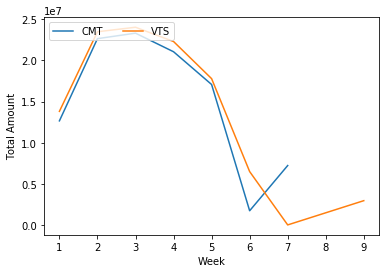

In [24]:
#17. Plot total amounts of each vendor
groupbymonth1 = data.groupby(by =['vendor_id','Week']).sum()
unique_vendors1 = data.vendor_id.unique()
for vendor in unique_vendors1:
    week_df = groupbymonth1.loc[(vendor, )]
    plt.plot(week_df.index, week_df.total_amount, label=vendor)

plt.legend(loc=2, ncol=2)
plt.xlabel("Week")
plt.ylabel("Total Amount")
plt.show()
#Insight:-> the shape total amount lines are quite the same as the shape of no of drive" lines. IT can be inferred that the taxi rate of
# both taxi vendors are similar.

C:\Users\tram.le2\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


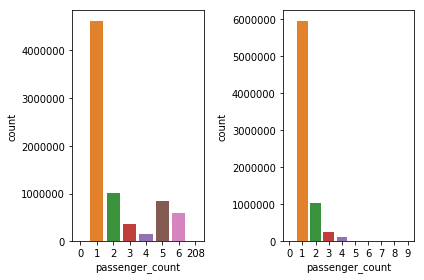

In [32]:
#18a. plot histogram of passenger of vendor VTS
fig,ax=plt.subplots(1,2)
sns.countplot(x="passenger_count", data=data[data["vendor_id"] == 'VTS'],ax=ax[0])
sns.countplot(x="passenger_count", data=data[data["vendor_id"] == 'CMT'],ax=ax[1])
fig.tight_layout()
fig.show()

# Insight: Since the passengers per drive of CMT vendor range from 1 to 4. This is inferred that Cars of CMT vendor have maximum
# 4 seats while cars of VTS can have maximum 6 seats. The number of trips that contain 5-6 people are quite high (around 180.000)
#It is can inferred that VTS has bigger car than CMT and VTS is quite popular among group.

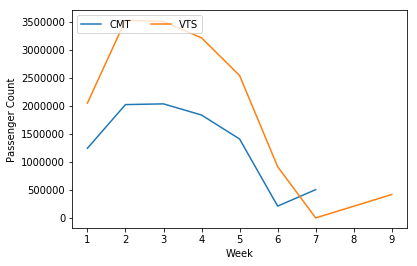

In [33]:
#19. plot passenger count of each vendor
groupbymonth3 = data.groupby(by =['vendor_id','Week']).sum()
unique_vendors1 = data.vendor_id.unique()
for vendor in unique_vendors1:
    week_df = groupbymonth3.loc[(vendor, )]
    plt.plot(week_df.index, week_df.passenger_count, label=vendor)

plt.legend(loc=2, ncol=2)
plt.xlabel("Week")
plt.ylabel("Passenger Count")
plt.show()
#Insight: after plotting, it is obviously shown that the passenger of VTS is much higher than the passenger of CMT.
# The reason could be the higher capacity of VTS cars, which is more suitable for big groups.